In [1]:
pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

jpg_image = cv2.imread('giyu.jpg')

if jpg_image is not None:
    cv2.imshow('giyu.jpg', jpg_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to read the image.")



In [3]:
from PIL import Image

# Open the JPG image
jpg_image_path = 'giyu.jpg'
jpg_image = Image.open(jpg_image_path)

# Save it as a PNG image
png_image_path = 'giyu.png'
jpg_image.save(png_image_path, 'PNG')


In [4]:
import matplotlib.pyplot as plt
from PIL import Image 
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

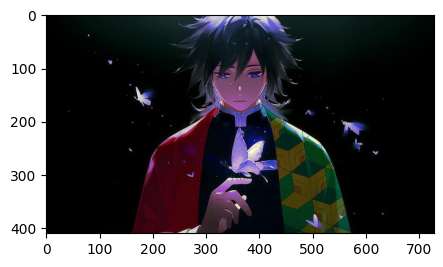

In [5]:
img=np.array(Image.open('giyu.png'))
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show

In [6]:
a= img

In [7]:
 id(a)==id(img)

True

In [8]:
b= img.copy()
id(b)==id(img)

False

In [9]:
"""There may be unexpected behaviours when two variables point to the same object in memory. Consider the array img. If we set all its entries to zero, all entires in A will become zero as well. However, as img and B points to different objects, the values in B will not be affected."""

'There may be unexpected behaviours when two variables point to the same object in memory. Consider the array img. If we set all its entries to zero, all entires in A will become zero as well. However, as img and B points to different objects, the values in B will not be affected.'

In [10]:
img[:,:,]=0

In [11]:
"""We can compare the variables giyu and array A:"""

'We can compare the variables giyu and array A:'

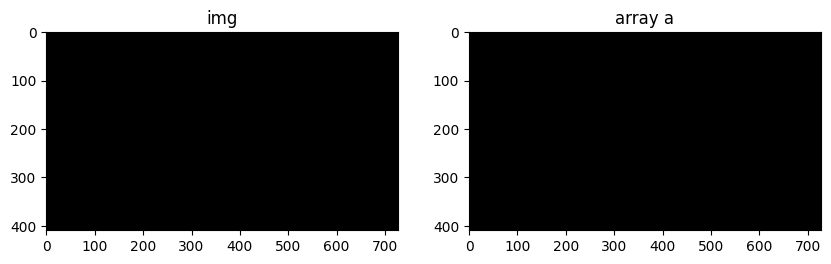

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.title("img")
plt.subplot(122)
plt.imshow(a)
plt.title("array a")
plt.show()

In [13]:
"""We see they are the same. This behaviour is called aliasing. Aliasing happens whenever one variable's value is assigned to another variable. Variables are references to values on the memory.

We can also compare img and array B:"""

"We see they are the same. This behaviour is called aliasing. Aliasing happens whenever one variable's value is assigned to another variable. Variables are references to values on the memory.\n\nWe can also compare img and array B:"

<function matplotlib.pyplot.show(close=None, block=None)>

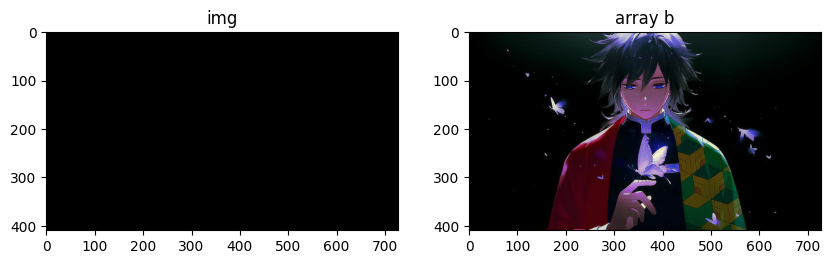

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.title("img")
plt.subplot(122)
plt.imshow(b)
plt.title("array b")
plt.show

In [15]:
"""If a PIL function does not return a new image, the same principle applies. We will go over some examples later on."""

'If a PIL function does not return a new image, the same principle applies. We will go over some examples later on.'

In [16]:
#Flipping Images

In [17]:
"""Flipping images involves reordering the indices of the pixels such that it changes the orientation of the image. Consider the following image:"""

'Flipping images involves reordering the indices of the pixels such that it changes the orientation of the image. Consider the following image:'

<function matplotlib.pyplot.show(close=None, block=None)>

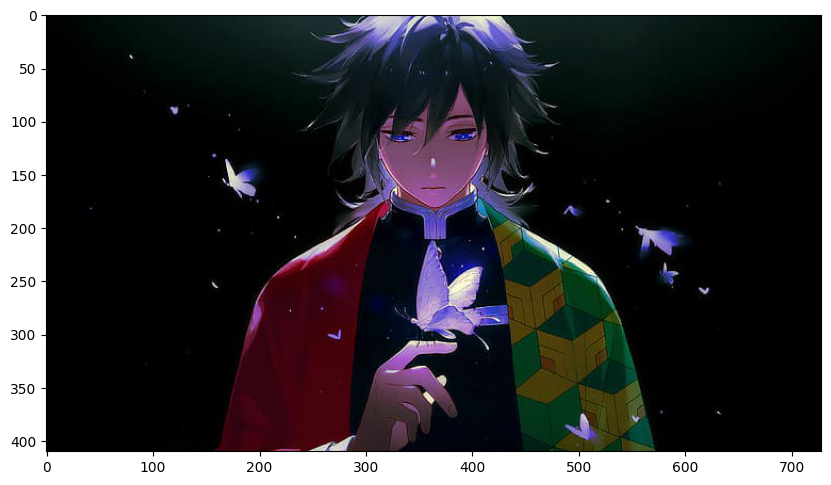

In [18]:
img=Image.open("giyu.png")
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show

In [19]:
#Cast to any array and find its shape
array=np.array(img)
width, height, c = array.shape
print('width, height, c',width,height, c)

width, height, c 410 728 3


In [20]:
"""Let's flip, i.e rotate vertically, the image. Let's try the traditional approach. First, we create an array of the same size with datatype np.uint8 """

"Let's flip, i.e rotate vertically, the image. Let's try the traditional approach. First, we create an array of the same size with datatype np.uint8 "

In [21]:
array_flip=np.zeros((width,height,c),dtype=np.uint8)

In [22]:
"""We assign the first row of pixels of the original array to the new array’s last row. We repeat the process for every row, incrementing the row number from the original array and decreasing the new array’s row index to assign the pixels accordingly. After excecuting the for loop below, array_flip will become the flipped image."""

'We assign the first row of pixels of the original array to the new array’s last row. We repeat the process for every row, incrementing the row number from the original array and decreasing the new array’s row index to assign the pixels accordingly. After excecuting the for loop below, array_flip will become the flipped image.'

In [23]:
for i,row in enumerate(array):
    array_flip[width - 1 - i, :, :] = row

In [24]:
"""PIL has several ways to flip an image, for example,  use the ImageOps module:"""

'PIL has several ways to flip an image, for example,  use the ImageOps module:'

In [25]:
from PIL import ImageOps

<function matplotlib.pyplot.show(close=None, block=None)>

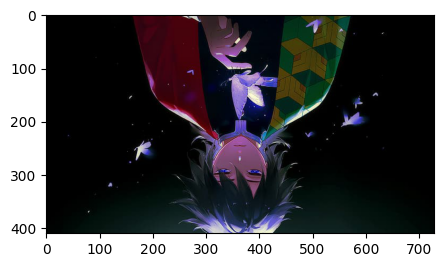

In [26]:
#The flip() method of ImageOps module flips the image. The mirror() method will mirror the image:
im_flip=ImageOps.flip(img)
plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

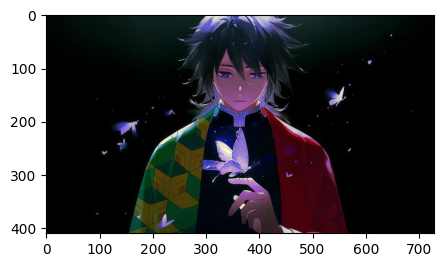

In [27]:
im_mirror=ImageOps.mirror(img)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show

In [28]:
"""We can use the transpose() method; the parameter is an integer indicating what type of transposition we would like to perform. For example, we can flip the image using a value of 1."""

'We can use the transpose() method; the parameter is an integer indicating what type of transposition we would like to perform. For example, we can flip the image using a value of 1.'

<function matplotlib.pyplot.show(close=None, block=None)>

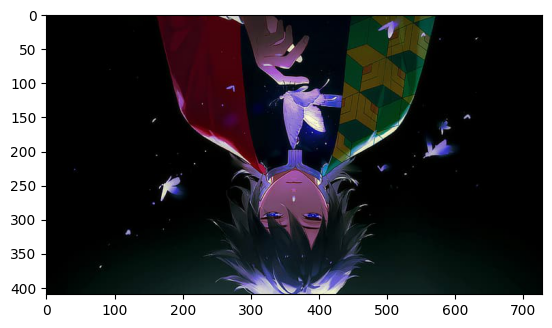

In [29]:
im_flip=img.transpose(1)
plt.imshow(im_flip)
plt.show

In [30]:
"""The Image module has built-in attributes that describe the type of flip. The values are just integers. Several are shown in the following dict:"""

'The Image module has built-in attributes that describe the type of flip. The values are just integers. Several are shown in the following dict:'

In [31]:
flip={"FLIP_LEFT_RIGHT":Image.FLIP_LEFT_RIGHT,
      "FLIP_TOP_BOTTOM":Image.FLIP_TOP_BOTTOM,
      "ROTATE_90":Image.ROTATE_90,
     "ROTATE_180":Image.ROTATE_180,
      "ROTATE_270":Image.ROTATE_270,
      "TRANSPOSE":Image.TRANSPOSE,
      "TRANSVERSE":Image.TRANSVERSE
     }

In [32]:
#We see the values are integers
flip["FLIP_LEFT_RIGHT"]

0

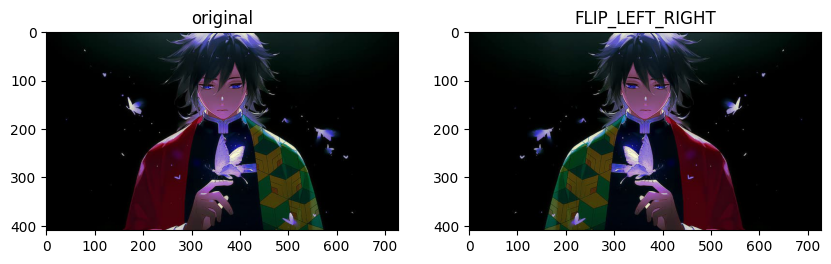

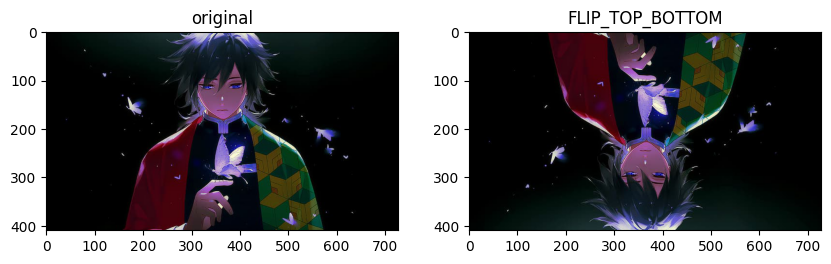

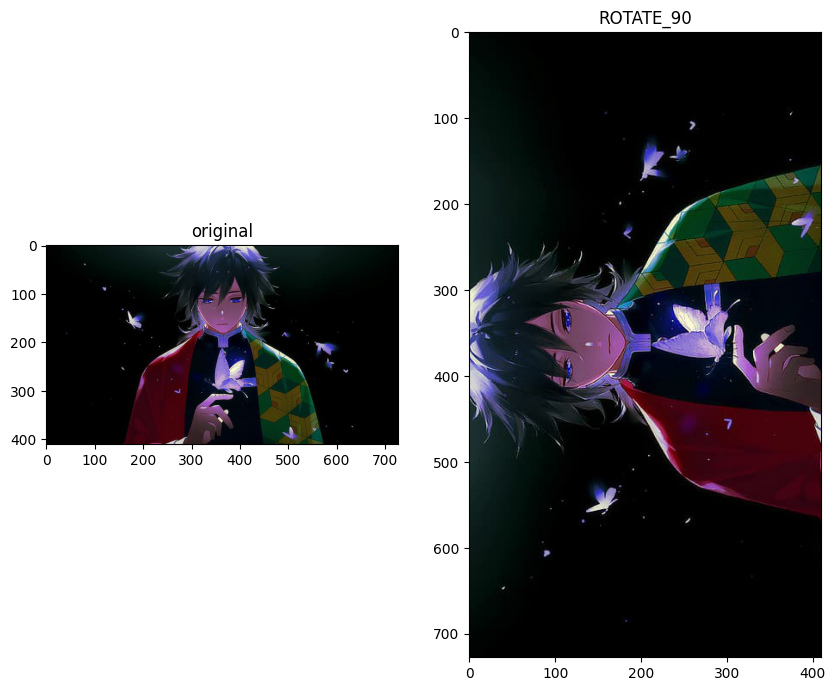

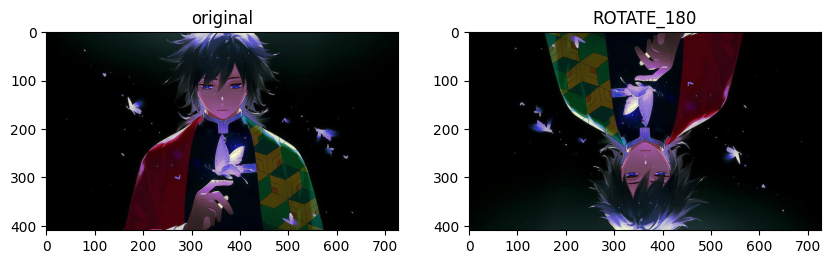

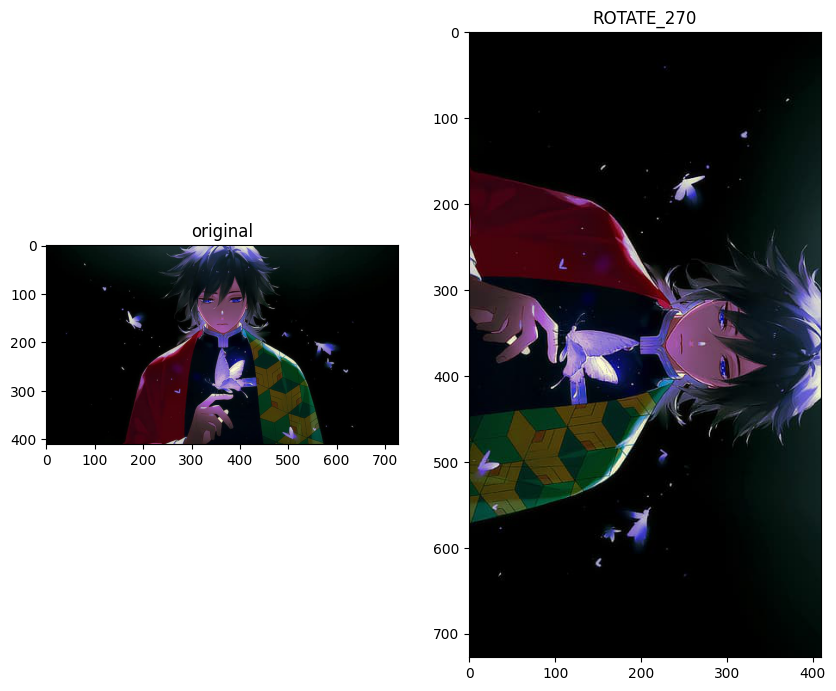

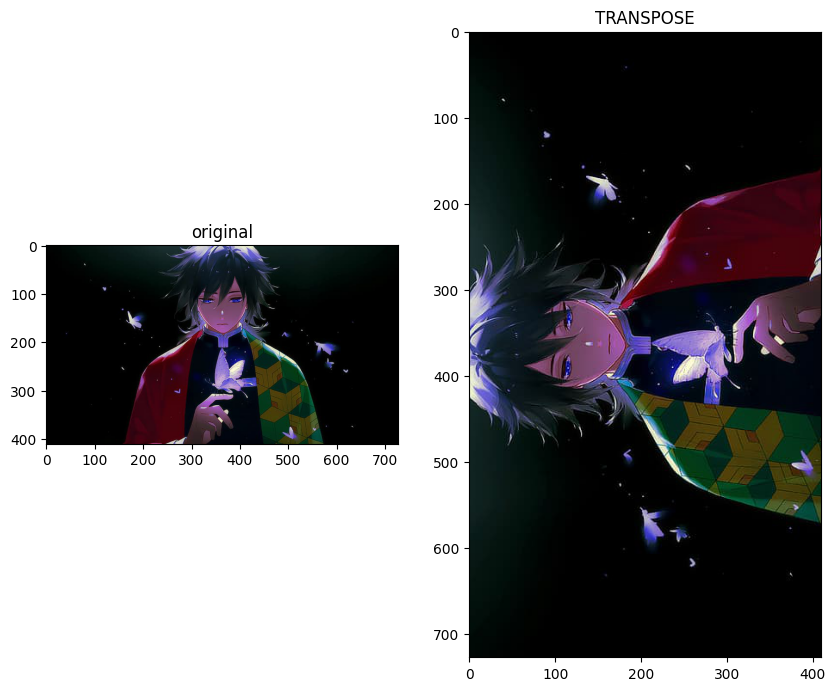

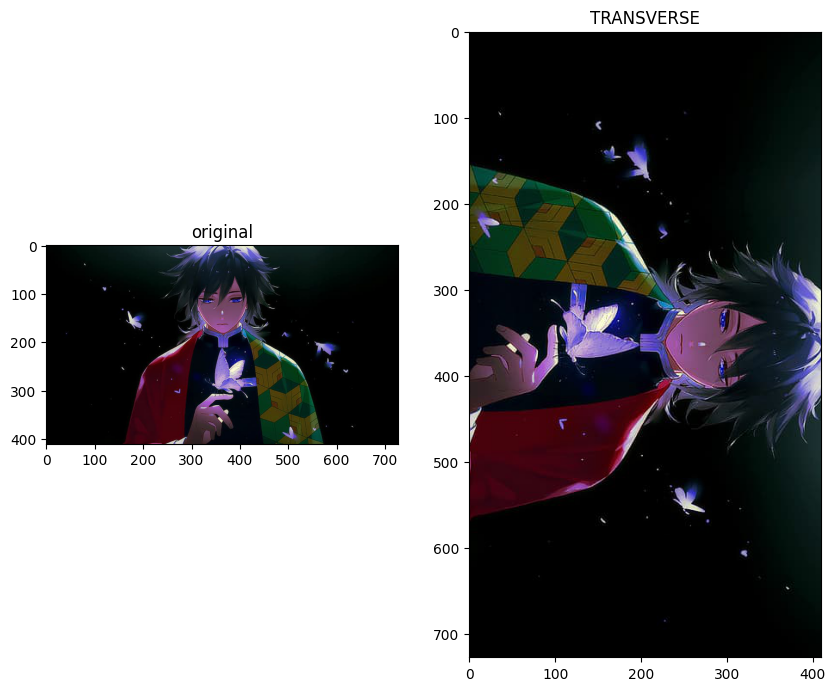

In [33]:
#We can plot each of the outputs using the different parameter values
for key, values in flip.items():
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("original")
    
    plt.subplot(1, 2, 2)
    plt.imshow(img.transpose(values))
    plt.title(key)
    
    plt.show()



In [34]:
#CROPPING AN IMAGE

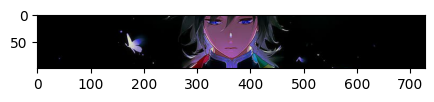

In [35]:
upper=100
lower=200
crop_top = array[upper: lower,:,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

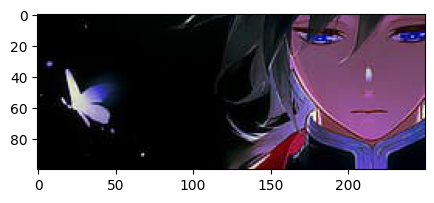

In [36]:
left = 150
right = 400
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_horizontal)
plt.show()

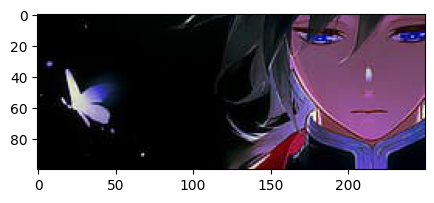

In [37]:
image=Image.open("giyu.png")
crop_image= image.crop((left,upper, right, lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_image)
plt.show()

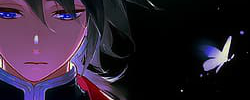

In [38]:
crop_image=crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

In [39]:
#Changing Specific Image Pixels

In [40]:
array_sq= np.copy(array)
array_sq[upper:lower, left:right, 1:2]=0

<function matplotlib.pyplot.show(close=None, block=None)>

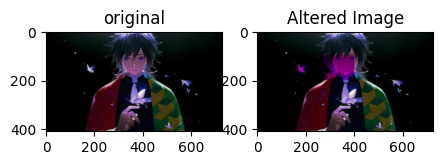

In [41]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(array_sq)
plt.title("Altered Image")
plt.show

In [42]:
from PIL import ImageDraw

In [43]:
image_draw=image.copy()
image_fn = ImageDraw.Draw(im=image_draw)

In [44]:
"""Whatever method we apply to the object image_fn, will change the image object image_draw. We can draw a rectangle using the rectangle function, two important parameters include: xy – the coordinates bounding box and fill – Color of the rectangle."""

'Whatever method we apply to the object image_fn, will change the image object image_draw. We can draw a rectangle using the rectangle function, two important parameters include: xy – the coordinates bounding box and fill – Color of the rectangle.'

In [45]:
shape=[left,upper,right,lower]
image_fn.rectangle(xy=shape, fill="blue")

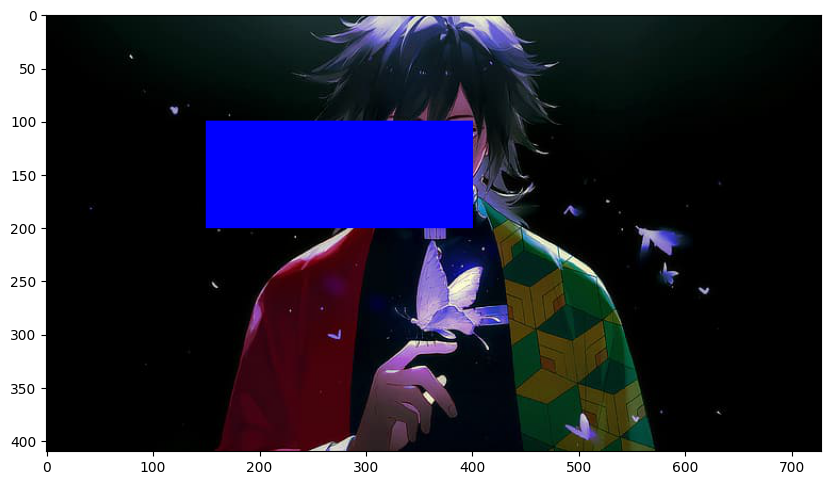

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

In [47]:
from PIL import ImageFont

In [48]:
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))

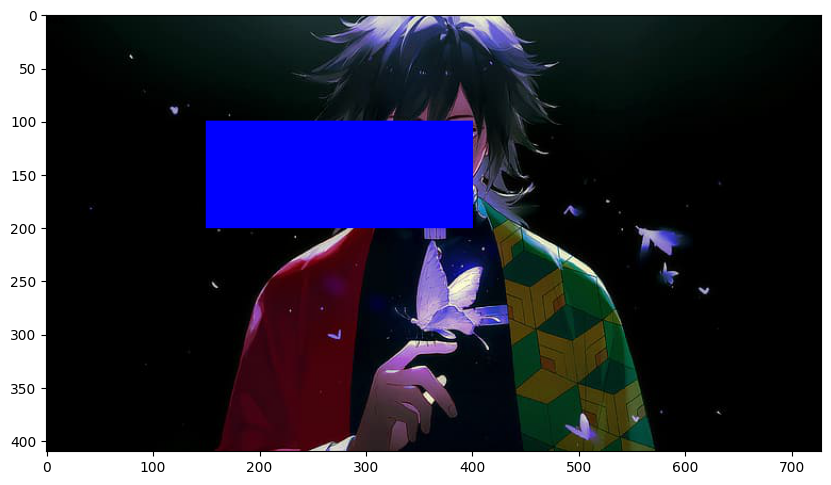

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

In [50]:
image_11=Image.open("11.jpeg")
array_11=np.array(image_11)

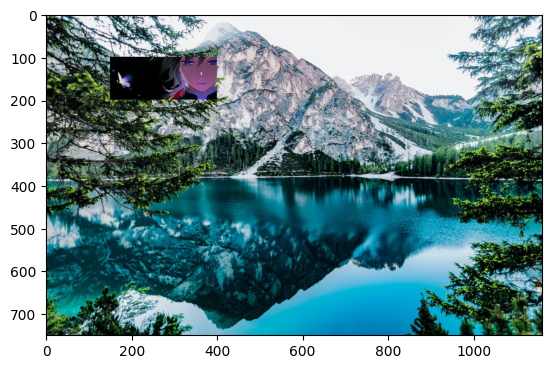

In [51]:
array_11[upper:lower,left:right,:]=array[upper:lower,left:right,:]
plt.imshow(array_11)
plt.show()

In [52]:

image_11.paste(crop_image, box=(left,upper))

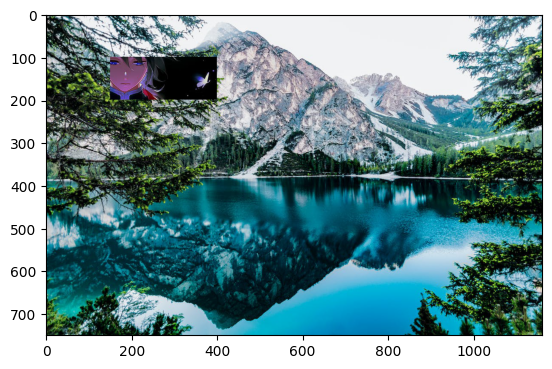

In [53]:
plt.imshow(image_11)
plt.show()


In [54]:
image = Image.open("giyu.png")
new_image=image
copy_image=image.copy()

In [55]:
id(image)==id(new_image)


True

In [56]:
id(image)==id(copy_image)

False

In [57]:
image_fn= ImageDraw.Draw(im=image)
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))
image_fn.rectangle(xy=shape,fill="red")

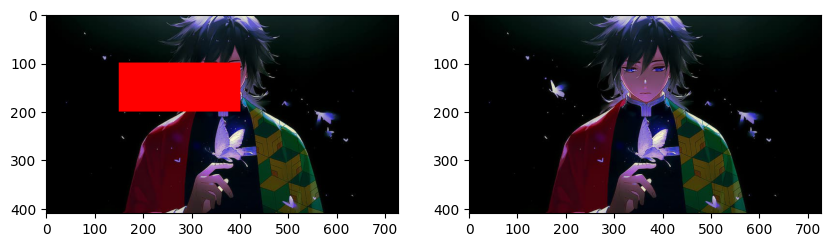

In [58]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(new_image)
plt.subplot(122)
plt.imshow(copy_image)
plt.show()